<a href="https://colab.research.google.com/github/poonsolai/diabetes-source-code/blob/main/Diabetes_(EDA_%26_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTIMPORTANTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
iammustafatz_diabetes_prediction_dataset_path = kagglehub.dataset_download('iammustafatz/diabetes-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [10]:
df.shape

(100000, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [16]:
df.describe(include='O')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [15]:
df.duplicated().sum()

np.int64(3854)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [20]:
df.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


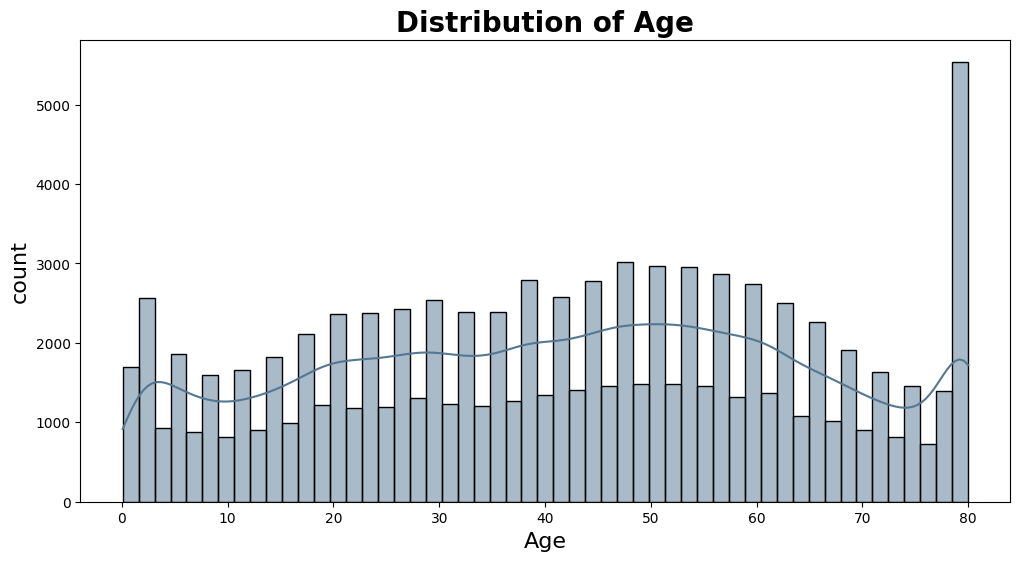

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['age'],kde=True,color='#547792')
plt.title('Distribution of Age',fontsize=20,fontweight='bold')
plt.xlabel('Age',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.show()

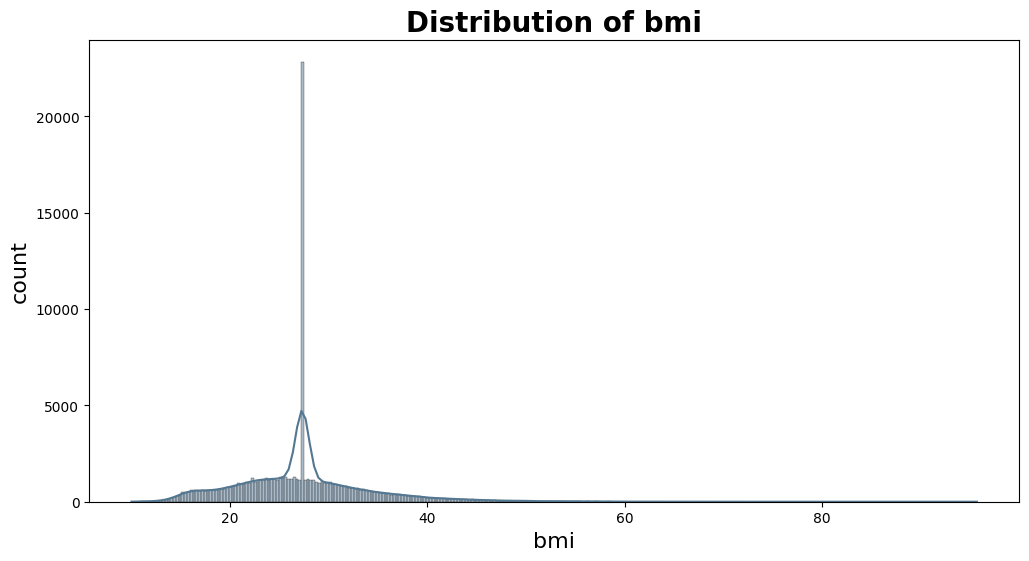

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['bmi'],kde=True,color='#547792')
plt.title('Distribution of bmi',fontsize=20,fontweight='bold')
plt.xlabel('bmi',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.show()

In [24]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['bmi']=df['bmi'].clip(lower_bound,upper_bound)

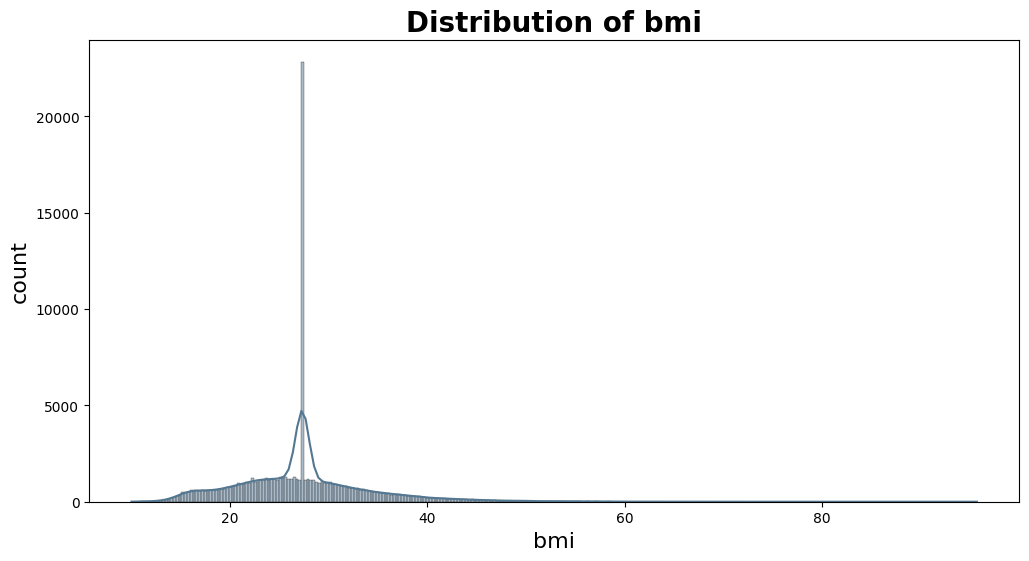

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['bmi'],kde=True,color='#547792')
plt.title('Distribution of bmi',fontsize=20,fontweight='bold')
plt.xlabel('bmi',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.show()

In [26]:
corr=df['diabetes'].corr(df['age'])
corr

np.float64(0.2649269242360693)

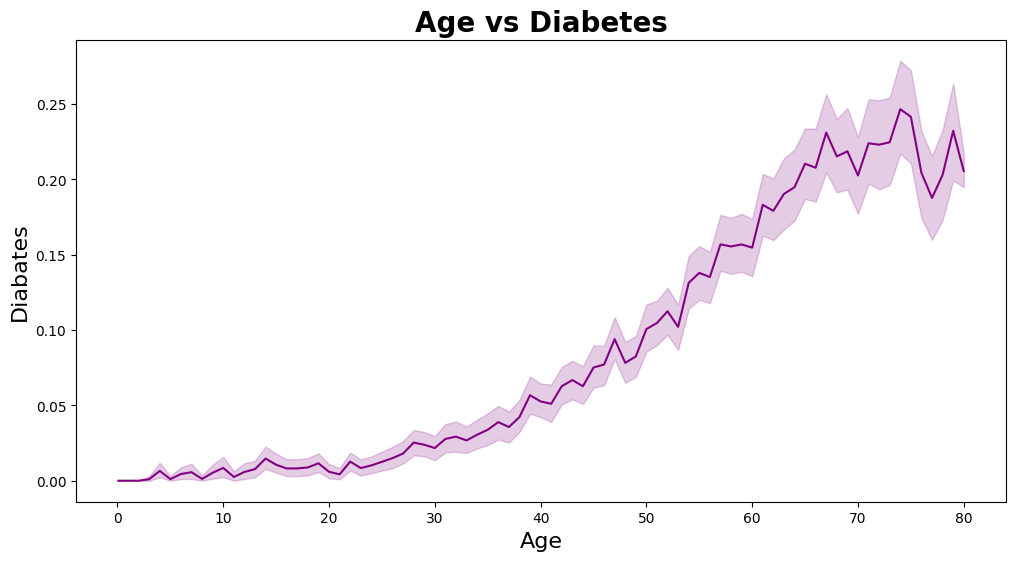

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['age'],y=df['diabetes'],color='purple')
plt.title('Age vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('Age',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

In [28]:
corr=df['hypertension'].corr(df['diabetes'])
corr

np.float64(0.19570970179625743)

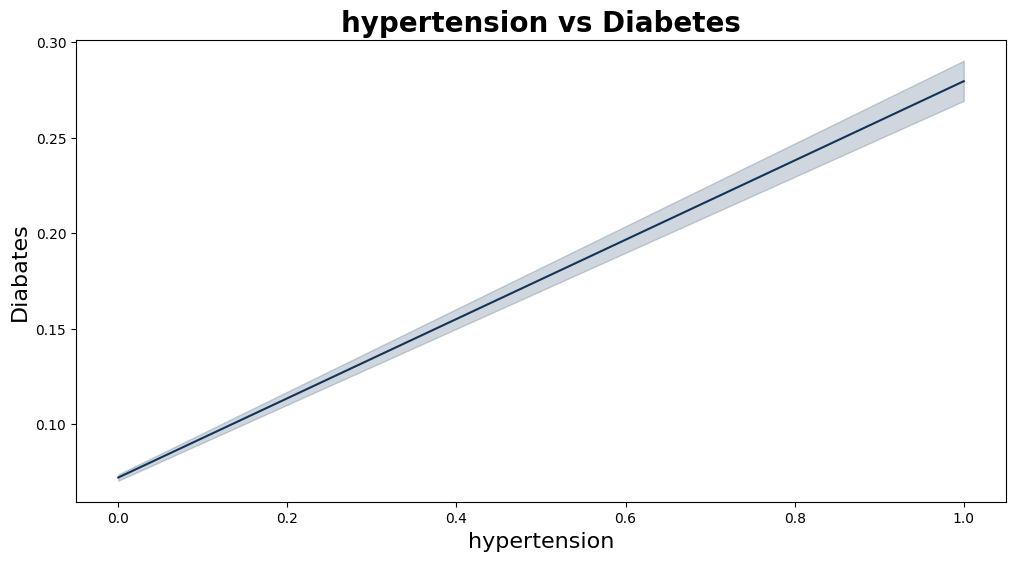

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['hypertension'],y=df['diabetes'],color='#123458')
plt.title('hypertension vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('hypertension',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

In [30]:
corr=df['heart_disease'].corr(df['diabetes'])
print(f"Correlation: {corr:.2f}")

Correlation: 0.17


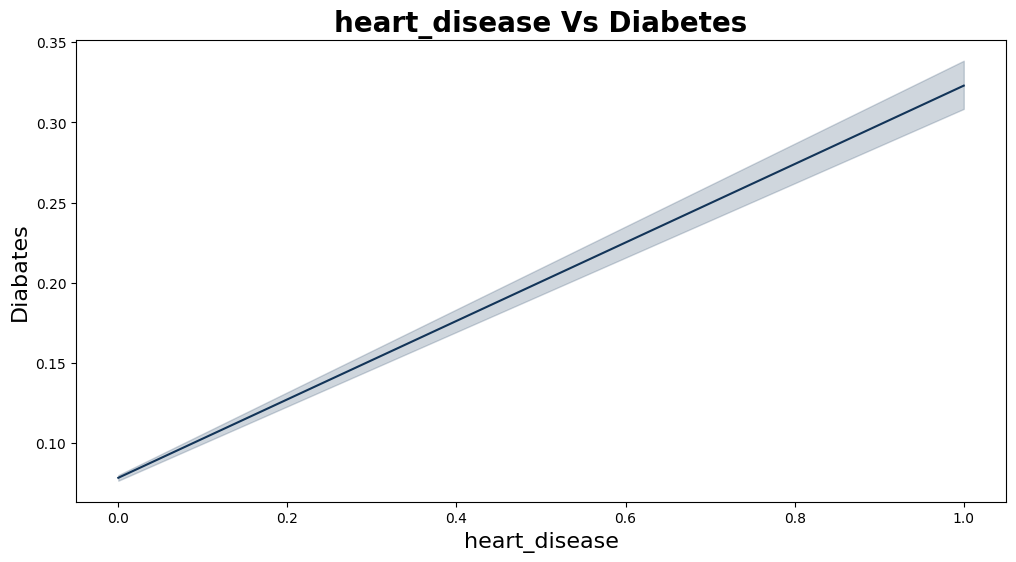

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['heart_disease'],y=df['diabetes'],color='#123458')
plt.title('heart_disease Vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('heart_disease',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

In [32]:
corr=df['bmi'].corr(df['diabetes'])
corr

np.float64(0.21201749738794654)

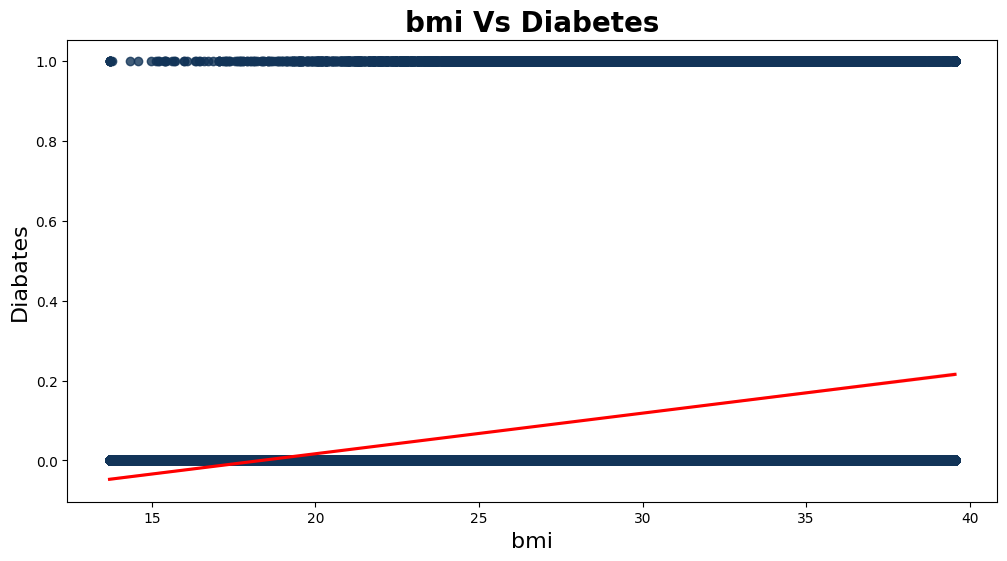

In [34]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['bmi'],y=df['diabetes'],color='#123458',line_kws={'color':'red'})
plt.title('bmi Vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('bmi',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

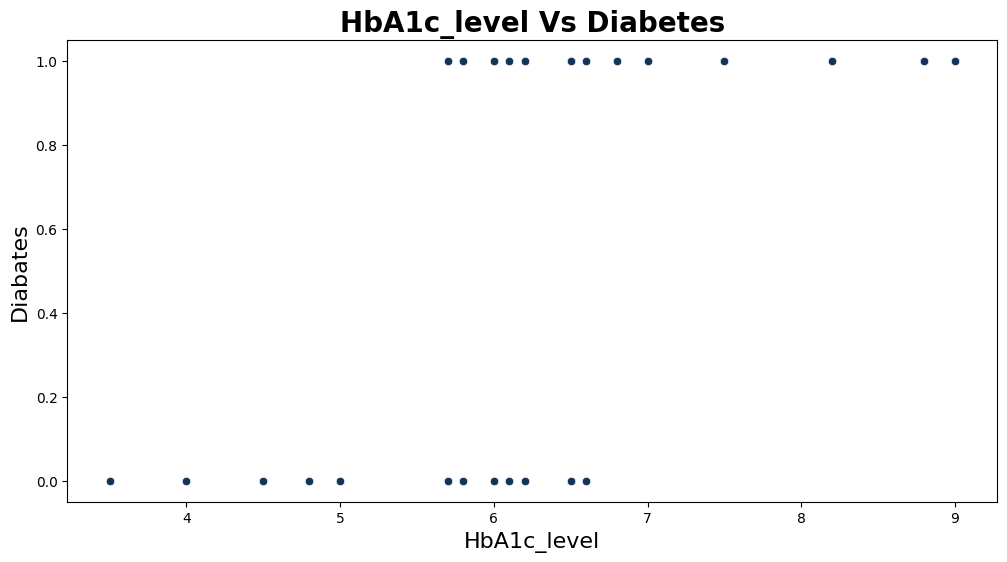

In [35]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['HbA1c_level'],y=df['diabetes'],color='#123458')
plt.title('HbA1c_level Vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('HbA1c_level',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

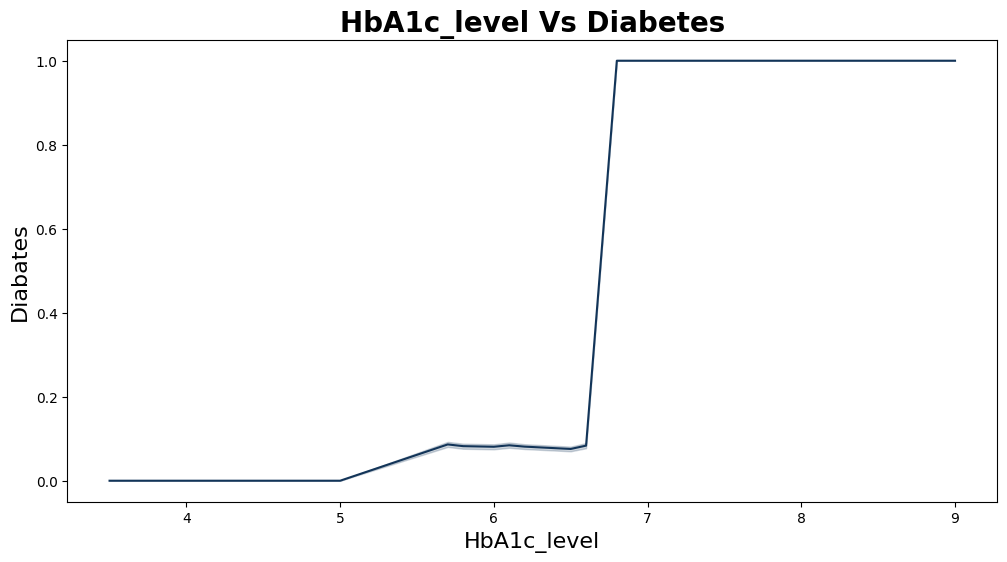

In [36]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['HbA1c_level'],y=df['diabetes'],color='#123458')
plt.title('HbA1c_level Vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('HbA1c_level',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

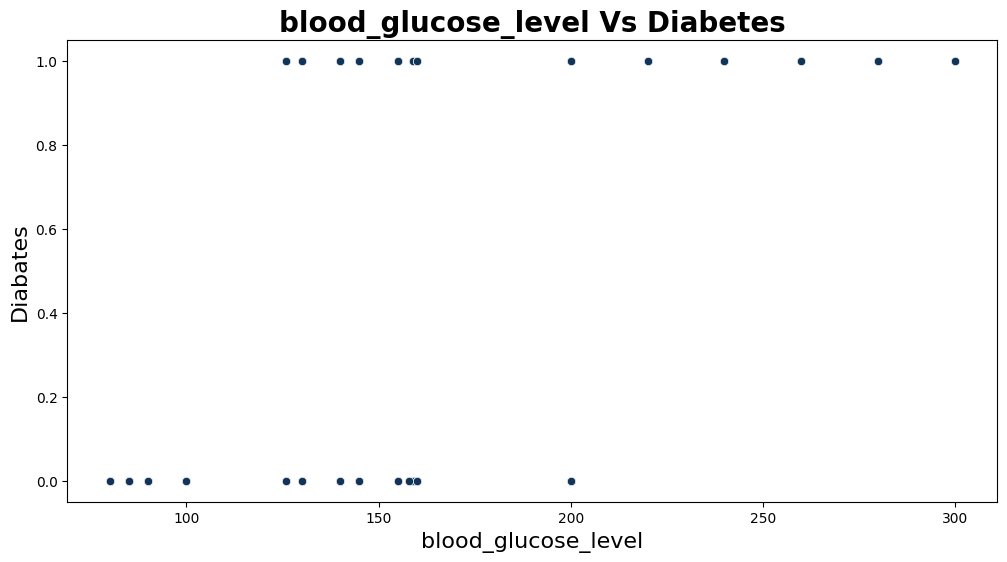

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['blood_glucose_level'],y=df['diabetes'],color='#123458')
plt.title('blood_glucose_level Vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('blood_glucose_level',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

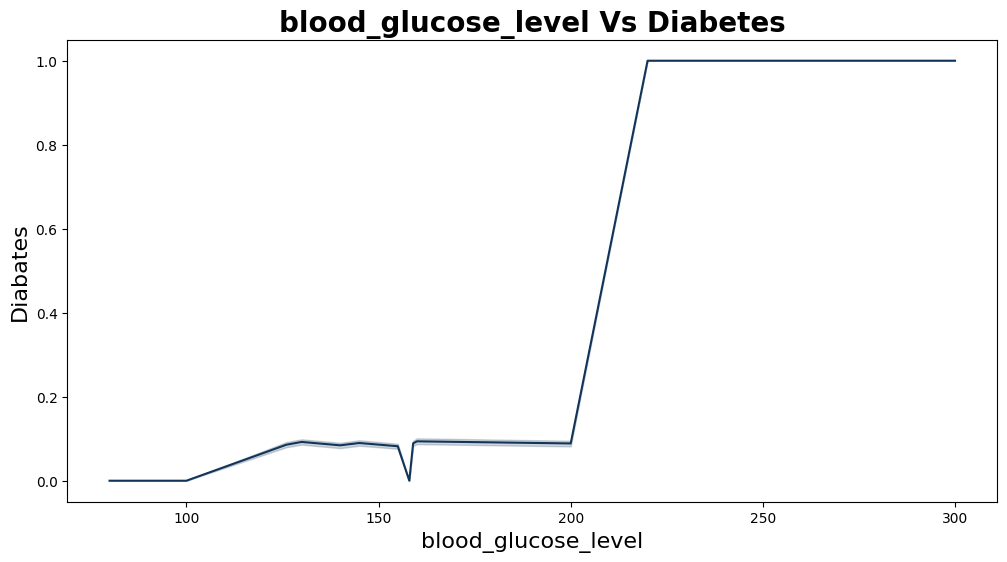

In [38]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['blood_glucose_level'],y=df['diabetes'],color='#123458')
plt.title('blood_glucose_level Vs Diabetes',fontsize=20,fontweight='bold')
plt.xlabel('blood_glucose_level',fontsize=16)
plt.ylabel('Diabates',fontsize=16)
plt.show()

> # ***Convert column Gender Into Numeric Column***

In [39]:
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])

In [40]:
df['gender']

,gender
0,0
1,0
2,1
3,0
4,1
...,...
99994,0
99996,0
99997,1
99998,0


In [41]:
corr=df['gender'].corr(df['diabetes'])
print(f"Correlation: {corr:.2f}")

Correlation: 0.04


In [42]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

> # ***Convert column smoking history Into Numeric Column***

In [43]:
df = pd.get_dummies(df,columns=['smoking_history'],drop_first=True)

In [46]:
df.dtypes

,0
gender,int64
age,float64
hypertension,int64
heart_disease,int64
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64
smoking_history_current,bool
smoking_history_ever,bool


In [44]:
corr = (df['diabetes'].corr(df['smoking_history_current']) + df['diabetes'].corr(df['smoking_history_ever']) + df['diabetes'].corr(df['smoking_history_former'])
                                                                                                                                    + df['diabetes'].corr(df['smoking_history_never'])
                                                                                                                                    + df['diabetes'].corr(df['smoking_history_not current'])
             )
print(f"Correlation: {corr:.2f}")

Correlation: 0.18


In [47]:
numerical_cols = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']

> # ***Scaler Data***

In [48]:
scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

> # ***Split Data***

In [49]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

> # ***Logistic Regression Model***

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

> # ***Calculate Accuracy***

In [52]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
y_pred = model.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9577223088923557


In [53]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9593582609600083
0.9577223088923557


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.87      0.62      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.92      0.81      0.85     19230
weighted avg       0.96      0.96      0.95     19230



In [56]:
con = confusion_matrix(y_test,y_pred)
con

array([[17346,   163],
       [  650,  1071]])

> # ***Confusion Matrix***

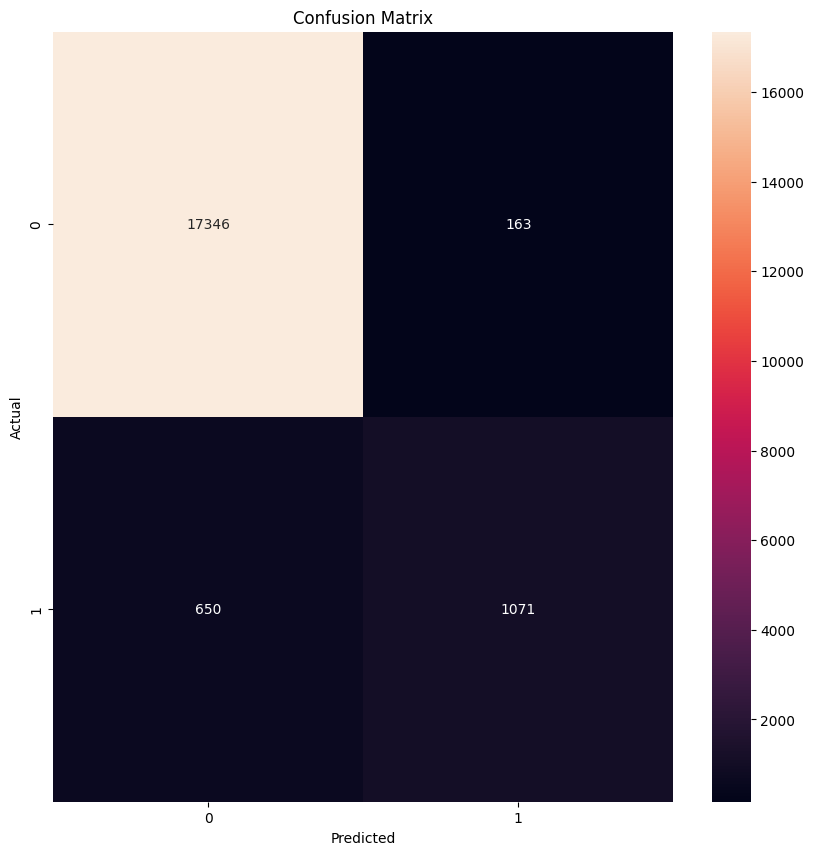

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(con, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

> # ***Save Model***

In [58]:
import pickle

pickle.dump(model,open("Logistic_Model.pkl","wb"))

> # ***KNN Classifier***

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

> # ***Calculate Accuracy***

In [62]:
y_pred = knn.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9571502860114405


In [64]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.9617374798481461
0.9571502860114405


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17509
           1       0.96      0.54      0.69      1721

    accuracy                           0.96     19230
   macro avg       0.96      0.77      0.84     19230
weighted avg       0.96      0.96      0.95     19230



In [66]:
con = confusion_matrix(y_test,y_pred)
con

array([[17469,    40],
       [  784,   937]])

> # ***Confusion Matrix***

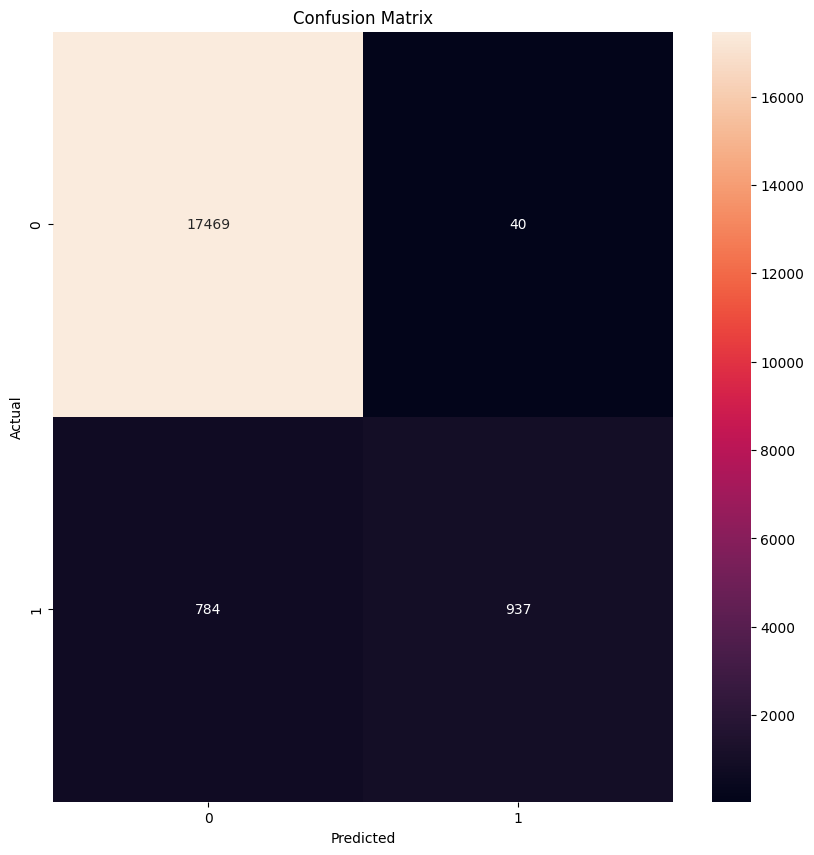

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(con, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

> # ***Save Model***

In [68]:
import pickle

pickle.dump(knn,open("Knn_Model.pkl","wb"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')